In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [15]:
#Setting a random seed for reproducibility
np.random.seed(0)

num_samples = 40

x_1 = np.random.multivariate_normal([2 , 2] , [[1 , .75] , [.75 , 1]] , num_samples)
y_1 = np.zeros(num_samples)

x_2 = np.random.multivariate_normal([-1 , -1] , [[1 , .75] , [.75 , 1]] , num_samples)
y_2 = np.ones(num_samples)

x = np.vstack((x_1 , x_2))
y = np.hstack((y_1 , y_2))

print(x)

[[ 0.20840319  0.49135707]
 [ 0.29219906  1.87674984]
 [ 0.59857937 -0.09246045]
 [ 1.16478652  1.05776081]
 [ 1.9513839   2.24172089]
 [ 1.35109625  2.37942291]
 [ 1.24509578  1.33113301]
 [ 1.46683227  1.70277565]
 [ 0.6749514   0.5298826 ]
 [ 2.00912042  1.40518354]
 [ 4.15701423  4.61919237]
 [ 1.45378894  0.92899902]
 [ 0.39103488 -0.63735695]
 [ 2.02337631  1.89101734]
 [ 0.04671956  1.08571311]
 [ 1.72135931  1.9887606 ]
 [ 3.53076483  2.13013022]
 [ 2.27016431  2.38071972]
 [ 0.42406297  1.27427392]
 [ 2.46919122  2.2554309 ]
 [ 3.48288364  2.47877933]
 [ 2.90636636  4.28577287]
 [ 2.63161862  2.32185331]
 [ 2.8969984   3.4467671 ]
 [ 3.58487825  3.43444815]
 [ 2.70084158  2.97442296]
 [ 2.89523097  2.06039794]
 [ 1.87492388  2.17780025]
 [ 1.83083887  2.0447188 ]
 [ 2.72160236  2.46510562]
 [ 2.75615039  2.50190791]
 [ 3.37096177  2.15029563]
 [ 1.97608405  1.69198203]
 [ 3.36129269  3.68852916]
 [ 2.83033444  2.86706538]
 [ 1.27239588  1.36360057]
 [ 1.37076511  0.4976114 ]
 

In [16]:
#1. Hypothesis

e = math.e
theta = np.asfarray([1 for _ in x[0]])
c = 1
def hypothesis(x):

    h = 1/(1+e ** -np.dot(theta , x.T) + c)

    #print(h)
    return h

In [17]:
#2. Cost function

def log_loss(h , y):
    res = [-math.log(h) if y == 1 else -math.log(1 - h) for _ in range(len(h))]

    return res

In [18]:
#3. Gradient Descent

def gradient_descent(x , y , h):

    n = len(x)

    theta_m = (1/n) * np.dot((h - y) , x)
    theta_c = (1/n) * np.sum(h - y)
    #print(theta_m)

    return [theta_m , theta_c] 


In [19]:
#4. Train Loop
iteration = 50000
l_rate = 0.0005
for i in range(iteration):
    
    h = hypothesis(x)
    gradient = gradient_descent(x , y , h)
    theta = theta - l_rate * gradient[0]
    c = c - l_rate * gradient[1]
    
    print(theta)
print(log_loss(h , y))

[0.99947267 0.99953846]
[0.99894537 0.99907694]
[0.9984181  0.99861544]
[0.99789085 0.99815397]
[0.99736363 0.99769253]
[0.99683644 0.99723111]
[0.99630928 0.99676972]
[0.99578215 0.99630835]
[0.99525504 0.99584701]
[0.99472797 0.9953857 ]
[0.99420092 0.99492441]
[0.9936739  0.99446314]
[0.9931469  0.99400191]
[0.99261994 0.99354069]
[0.992093  0.9930795]
[0.99156609 0.99261834]
[0.99103921 0.99215721]
[0.99051236 0.9916961 ]
[0.98998554 0.99123501]
[0.98945874 0.99077395]
[0.98893198 0.99031292]
[0.98840524 0.98985191]
[0.98787853 0.98939093]
[0.98735185 0.98892997]
[0.98682519 0.98846904]
[0.98629857 0.98800814]
[0.98577197 0.98754726]
[0.9852454  0.98708641]
[0.98471886 0.98662558]
[0.98419235 0.98616478]
[0.98366587 0.98570401]
[0.98313941 0.98524326]
[0.98261299 0.98478253]
[0.98208659 0.98432184]
[0.98156022 0.98386116]
[0.98103388 0.98340052]
[0.98050757 0.9829399 ]
[0.97998128 0.98247931]
[0.97945503 0.98201874]
[0.9789288 0.9815582]
[0.9784026  0.98109768]
[0.97787643 0.980637

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

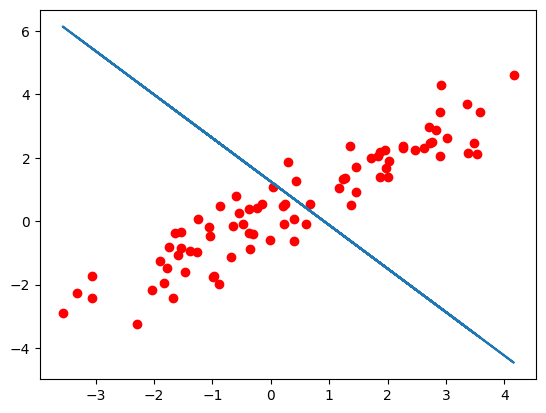

In [ ]:
#Ploting Graph
plt.scatter(x.T[0], x.T[1] , c = "red")
plt.plot(x.T[0] , -((theta[0]/theta[1])*x.T[0]) - c/theta[1])
plt.show()